In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [20]:
df = pd.read_csv("./Data/bearing.xls")
df.head(5)

,Time,MCB05_A1_TOOL1_COUNT,MCB05_A1_TOOL1_LIFE,MCB05_A1_TOOL2_COUNT,MCB05_A1_TOOL2_LIFE,MCB05_A1_TOOL3_COUNT,MCB05_A1_TOOL3_LIFE,MCB05_A1_SPINDLE_LOAD,MCB05_A1_SPINDLE_SPEED,MCB05_A1_PROGNUM,...,MCB05_A2_SERVO_LOAD_X,MCB05_A2_SERVO_LOAD_Z,MCB05_A2_RUNING,MCB05_A2_CUTTING,MCB05_A2_STATE_EMER,MCB05_A2_ALARM,MCB05_A2_OPTIME,MCB05_A2_CYCLE_TIME,MCB05_A_GOOD_TOTAL,MCB05_A_BAD_TOTAL
0,2022-09-13_09:00:00.000,1840,4000,1807,2000,147,4608,4,900,5220,...,5,137,1,0,0,0,60.0,12.5,191,5
1,2022-09-13_09:00:00.100,1840,4000,1807,2000,147,4608,22,900,5220,...,5,137,1,0,0,0,60.0,12.5,191,5
2,2022-09-13_09:00:00.200,1840,4000,1807,2000,147,4608,45,900,5220,...,5,105,1,0,0,0,60.0,12.5,191,5
3,2022-09-13_09:00:00.300,1840,4000,1807,2000,147,4608,65,900,5220,...,5,106,1,0,0,0,60.0,12.5,191,5
4,2022-09-13_09:00:00.400,1840,4000,1807,2000,147,4608,70,900,5220,...,5,106,1,0,0,0,60.0,12.5,191,5


In [21]:
display(df.shape)
display(df.columns)
print()
display(df.info())
display(df.describe())

(36000, 45)

Index(['Time', 'MCB05_A1_TOOL1_COUNT', 'MCB05_A1_TOOL1_LIFE',
       'MCB05_A1_TOOL2_COUNT', 'MCB05_A1_TOOL2_LIFE', 'MCB05_A1_TOOL3_COUNT',
       'MCB05_A1_TOOL3_LIFE', 'MCB05_A1_SPINDLE_LOAD',
       'MCB05_A1_SPINDLE_SPEED', 'MCB05_A1_PROGNUM', 'MCB05_A1_SEQNUM',
       'MCB05_A1_FEEDRATE', 'MCB05_A1_AXIS_ABS_X', 'MCB05_A1_AXIS_ABS_Z',
       'MCB05_A1_SERVO_LOAD_X', 'MCB05_A1_SERVO_LOAD_Z', 'MCB05_A1_RUNING',
       'MCB05_A1_CUTTING', 'MCB05_A1_STATE_EMER', 'MCB05_A1_ALARM',
       'MCB05_A1_OPTIME', 'MCB05_A1_CYCLE_TIME', 'MCB05_A2_TOOL1_COUNT',
       'MCB05_A2_TOOL1_LIFE', 'MCB05_A2_TOOL2_COUNT', 'MCB05_A2_TOOL2_LIFE',
       'MCB05_A2_TOOL3_COUNT', 'MCB05_A2_TOOL3_LIFE', 'MCB05_A2_SPINDLE_LOAD',
       'MCB05_A2_SPINDLE_SPEED', 'MCB05_A2_PROGNUM', 'MCB05_A2_SEQNUM',
       'MCB05_A2_FEEDRATE', 'MCB05_A2_AXIS_ABS_X', 'MCB05_A2_AXIS_ABS_Z',
       'MCB05_A2_SERVO_LOAD_X', 'MCB05_A2_SERVO_LOAD_Z', 'MCB05_A2_RUNING',
       'MCB05_A2_CUTTING', 'MCB05_A2_STATE_EMER', 'MCB05_A2_ALAR


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    36000 non-null  object 
 1   MCB05_A1_TOOL1_COUNT    36000 non-null  int64  
 2   MCB05_A1_TOOL1_LIFE     36000 non-null  int64  
 3   MCB05_A1_TOOL2_COUNT    36000 non-null  int64  
 4   MCB05_A1_TOOL2_LIFE     36000 non-null  int64  
 5   MCB05_A1_TOOL3_COUNT    36000 non-null  int64  
 6   MCB05_A1_TOOL3_LIFE     36000 non-null  int64  
 7   MCB05_A1_SPINDLE_LOAD   36000 non-null  int64  
 8   MCB05_A1_SPINDLE_SPEED  36000 non-null  int64  
 9   MCB05_A1_PROGNUM        36000 non-null  int64  
 10  MCB05_A1_SEQNUM         36000 non-null  int64  
 11  MCB05_A1_FEEDRATE       36000 non-null  int64  
 12  MCB05_A1_AXIS_ABS_X     36000 non-null  float64
 13  MCB05_A1_AXIS_ABS_Z     36000 non-null  float64
 14  MCB05_A1_SERVO_LOAD_X   36000 non-nul

None

,MCB05_A1_TOOL1_COUNT,MCB05_A1_TOOL1_LIFE,MCB05_A1_TOOL2_COUNT,MCB05_A1_TOOL2_LIFE,MCB05_A1_TOOL3_COUNT,MCB05_A1_TOOL3_LIFE,MCB05_A1_SPINDLE_LOAD,MCB05_A1_SPINDLE_SPEED,MCB05_A1_PROGNUM,MCB05_A1_SEQNUM,...,MCB05_A2_SERVO_LOAD_X,MCB05_A2_SERVO_LOAD_Z,MCB05_A2_RUNING,MCB05_A2_CUTTING,MCB05_A2_STATE_EMER,MCB05_A2_ALARM,MCB05_A2_OPTIME,MCB05_A2_CYCLE_TIME,MCB05_A_GOOD_TOTAL,MCB05_A_BAD_TOTAL
count,36000.000000,36000.0,36000.000000,36000.0,36000.000000,36000.0,36000.000000,36000.000000,36000.0,36000.0,...,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.0,36000.000000,36000.000000,36000.000000,36000.000000
mean,1992.037583,4000.0,948.692722,2000.0,293.255139,4608.0,33.359000,749.967806,5220.0,0.0,...,18.494056,19.051833,0.960389,0.397361,0.001667,0.0,88.954010,12.279103,338.147750,5.622278
std,73.469435,0.0,934.319881,0.0,73.230585,0.0,43.569969,465.316810,0.0,0.0,...,33.197940,40.629343,0.195046,0.489359,0.057712,0.0,16.326491,11.496940,77.725723,0.916281
min,1840.000000,4000.0,2.000000,2000.0,147.000000,4608.0,0.000000,0.000000,5220.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,60.000000,5.200000,191.000000,5.000000
25%,1938.000000,4000.0,28.000000,2000.0,235.000000,4608.0,4.000000,441.000000,5220.0,0.0,...,5.000000,0.000000,1.000000,0.000000,0.000000,0.0,75.000000,8.800000,274.000000,5.000000
50%,2002.000000,4000.0,96.000000,2000.0,303.000000,4608.0,13.000000,900.000000,5220.0,0.0,...,6.000000,0.000000,1.000000,0.000000,0.000000,0.0,90.000000,9.500000,357.000000,5.000000
75%,2044.000000,4000.0,1866.000000,2000.0,344.000000,4608.0,45.000000,902.000000,5220.0,0.0,...,11.000000,4.000000,1.000000,1.000000,0.000000,0.0,102.633300,10.000000,391.000000,7.000000
max,2131.000000,4000.0,1998.000000,2000.0,433.000000,4608.0,149.000000,1403.000000,5220.0,0.0,...,158.000000,179.000000,1.000000,1.000000,2.000000,0.0,117.616700,86.700000,482.000000,7.000000


In [22]:
# preprocessing
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d_%H:%M:%S.%f')
df['defect_rate'] = df.MCB05_A_BAD_TOTAL / df.MCB05_A_GOOD_TOTAL * 100

In [23]:
# 분포도 확인
print('총 정상수 : ',df.MCB05_A_GOOD_TOTAL.sum())
print('총 정상수 : ',df.MCB05_A_BAD_TOTAL.sum())
print('불량비율', df.MCB05_A_BAD_TOTAL.sum() / df.MCB05_A_GOOD_TOTAL.sum())

총 정상수 :  12173319
총 정상수 :  202402
불량비율 0.01662668989451439


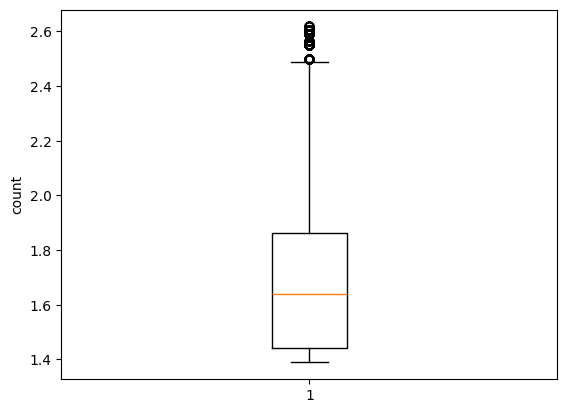

In [24]:
plt.figure()
plt.boxplot(list(df["defect_rate"]))
plt.ylabel("count")
plt.show()
# 3-4분위 수 사이면 경고 알림
# 4분위수 넘어가면 위험 알림

In [25]:
# 사분위수 계산
Q1 = df['defect_rate'].quantile(0.25).round(3)  # 1사분위수
Me = df['defect_rate'].median()
Q3 = df['defect_rate'].quantile(0.75).round(3)  # 3사분위수
print(Q1, Q3)

1.441 1.862


<Axes: >

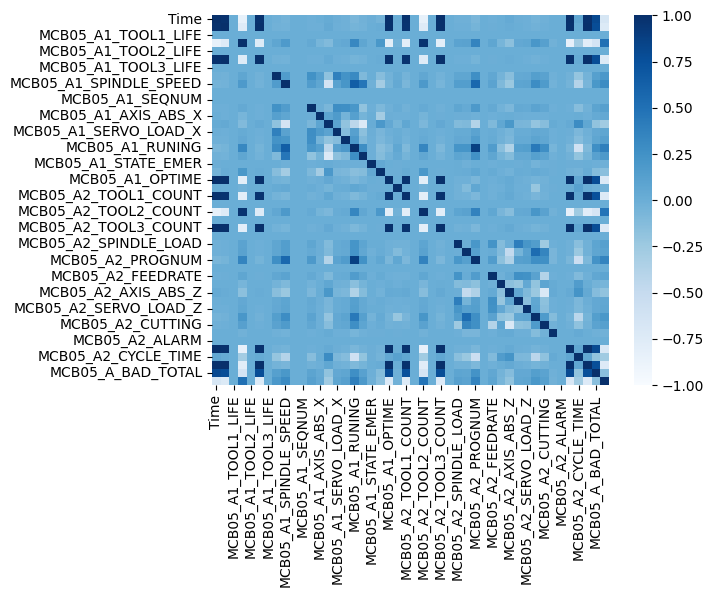

In [26]:
# 상관분석
df_corr = df.corr()
df_corr = df_corr.fillna(0)

df_corr.defect_rate
sns.heatmap(df_corr,
            # annot=True, fmt = '.2f', annot_kws = {'size' : 7},
            cmap='Blues',
            vmin=-1,vmax=1,)

In [27]:
high_corr = (df_corr.defect_rate).sort_values().head(10).reset_index()
high_corr = high_corr[high_corr.defect_rate <= -0.5]
display(high_corr)
high_corr_index = list(high_corr['index'])
high_corr_index

,index,defect_rate
0,MCB05_A_GOOD_TOTAL,-0.741638
1,MCB05_A1_TOOL1_COUNT,-0.727750
2,MCB05_A2_TOOL1_COUNT,-0.727195
3,MCB05_A1_TOOL3_COUNT,-0.727165
4,MCB05_A2_TOOL3_COUNT,-0.719501
5,MCB05_A1_OPTIME,-0.716567
6,MCB05_A2_OPTIME,-0.682980
7,Time,-0.669816


['MCB05_A_GOOD_TOTAL',
 'MCB05_A1_TOOL1_COUNT',
 'MCB05_A2_TOOL1_COUNT',
 'MCB05_A1_TOOL3_COUNT',
 'MCB05_A2_TOOL3_COUNT',
 'MCB05_A1_OPTIME',
 'MCB05_A2_OPTIME',
 'Time']

<Figure size 1000x800 with 0 Axes>

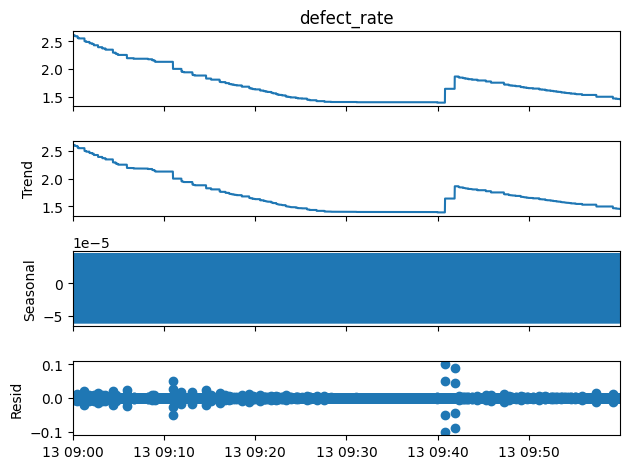

In [28]:
# 시계열분석
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df.set_index('Time', inplace=True)

result = seasonal_decompose(df['defect_rate'].dropna(), model='additive', period=5)

plt.figure(figsize=(10, 8))
result.plot()
plt.show()

In [29]:
# 데이터 증강 : 데이터 복제해서 랜덤 잡음 추가
target_rows = 36000*2 # 9-10 집중근무시간 -> 비슷한 경향 보일것이라 가정
n_repeats = target_rows // len(df) + 1
df_expanded = pd.concat([df] * n_repeats, ignore_index=True)

np.random.seed(42)

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        col_mean = df[col].mean()

        if col_mean <= 0:
            col_mean = 1

        noise = np.random.normal(0, 0.01 * col_mean, len(df_expanded))
        df_expanded[col] += noise

df_expanded = df_expanded.iloc[:target_rows].reset_index(drop=True)

print(f"기존 데이터 : {len(df)}")
print(f"새로운 데이터 : {len(df_expanded)}")
display(df_expanded.head())
display(df.describe().defect_rate, df_expanded.describe().defect_rate)

기존 데이터 : 36000
새로운 데이터 : 72000


,MCB05_A1_TOOL1_COUNT,MCB05_A1_TOOL1_LIFE,MCB05_A1_TOOL2_COUNT,MCB05_A1_TOOL2_LIFE,MCB05_A1_TOOL3_COUNT,MCB05_A1_TOOL3_LIFE,MCB05_A1_SPINDLE_LOAD,MCB05_A1_SPINDLE_SPEED,MCB05_A1_PROGNUM,MCB05_A1_SEQNUM,...,MCB05_A2_SERVO_LOAD_Z,MCB05_A2_RUNING,MCB05_A2_CUTTING,MCB05_A2_STATE_EMER,MCB05_A2_ALARM,MCB05_A2_OPTIME,MCB05_A2_CYCLE_TIME,MCB05_A_GOOD_TOTAL,MCB05_A_BAD_TOTAL,defect_rate
0,1849.894733,3908.065604,1816.698952,1989.999251,145.789738,4618.448928,4.188772,908.459676,5146.552244,0.007564,...,136.899284,1.006303,-0.002710,0.000003,0.004823,61.240419,12.422267,196.225836,4.971049,2.606575
1,1837.245723,3990.118186,1787.634131,1995.493807,147.354519,4602.301448,22.321707,895.253600,5126.282274,-0.016880,...,136.828361,0.992998,-0.001856,0.000025,-0.009589,60.006397,12.528713,188.687836,5.002163,2.624614
2,1852.902199,3917.043467,1802.982357,2005.105287,149.335761,4596.900127,44.946176,899.843105,5261.685438,0.001340,...,105.210445,1.013303,-0.001360,0.000018,-0.000634,60.251713,12.404883,190.844847,5.110902,2.596063
3,1870.339327,4031.454853,1807.820417,2015.003072,143.398980,4620.803311,64.228291,912.242802,5227.693597,0.005729,...,106.014496,0.988787,-0.000439,-0.000005,-0.003089,59.553644,12.368210,196.262441,5.078379,2.602979
4,1835.335577,4013.734837,1810.445340,1986.822542,147.229626,4601.877998,69.976280,907.673734,5180.483734,0.009785,...,106.046536,1.006850,0.008697,-0.000017,0.000620,59.470389,12.436626,187.864552,5.048358,2.612553


count    36000.000000
mean         1.717223
std          0.320027
min          1.388889
25%          1.440922
50%          1.639344
75%          1.861702
max          2.617801
Name: defect_rate, dtype: float64

count    72000.000000
mean         1.717241
std          0.320497
min          1.334528
25%          1.443579
50%          1.632923
75%          1.854196
max          2.652352
Name: defect_rate, dtype: float64

In [13]:
df = df_expanded.copy()
high_corr_index.pop()

'Time'

In [14]:
# 회귀분석
high_corr_index.pop() # Time 삭제처리(datetime형이므로)
X = df[high_corr_index]
y = df['defect_rate']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            defect_rate   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                 1.748e+04
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        08:05:35   Log-Likelihood:                 12125.
No. Observations:               72000   AIC:                        -2.424e+04
Df Residuals:                   71993   BIC:                        -2.417e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.8758 

#### regresssor

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    36000 non-null  object 
 1   MCB05_A1_TOOL1_COUNT    36000 non-null  int64  
 2   MCB05_A1_TOOL1_LIFE     36000 non-null  int64  
 3   MCB05_A1_TOOL2_COUNT    36000 non-null  int64  
 4   MCB05_A1_TOOL2_LIFE     36000 non-null  int64  
 5   MCB05_A1_TOOL3_COUNT    36000 non-null  int64  
 6   MCB05_A1_TOOL3_LIFE     36000 non-null  int64  
 7   MCB05_A1_SPINDLE_LOAD   36000 non-null  int64  
 8   MCB05_A1_SPINDLE_SPEED  36000 non-null  int64  
 9   MCB05_A1_PROGNUM        36000 non-null  int64  
 10  MCB05_A1_SEQNUM         36000 non-null  int64  
 11  MCB05_A1_FEEDRATE       36000 non-null  int64  
 12  MCB05_A1_AXIS_ABS_X     36000 non-null  float64
 13  MCB05_A1_AXIS_ABS_Z     36000 non-null  float64
 14  MCB05_A1_SERVO_LOAD_X   36000 non-null

In [15]:
X = df[high_corr_index] # .append('Time')
y = df['defect_rate']

scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}', '\n', f'R²: {r2}')
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}', '\n', f'R²: {r2}')

Mean Squared Error: 0.0006545083400872376 
 R²: 0.993625857549798


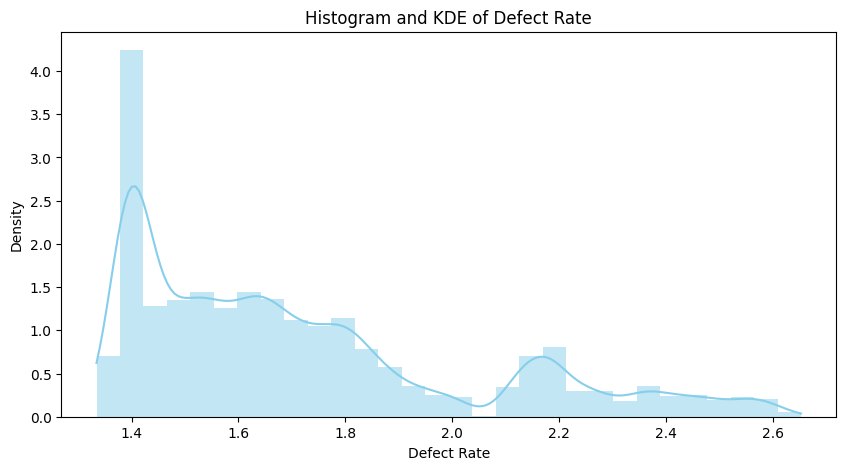

In [16]:
# 정규분포 따르는지 확인
# 안따르지만 방법 없으니 일단 진행 -> 만약 현업 적용한다면 현업과 상의해서 정하는 것이 좋을듯
plt.figure(figsize=(10,5))
sns.histplot(df['defect_rate'], kde=True, bins=30, color='skyblue', stat='density', linewidth=0)
plt.title('Histogram and KDE of Defect Rate')
plt.xlabel('Defect Rate')
plt.ylabel('Density')
plt.show()

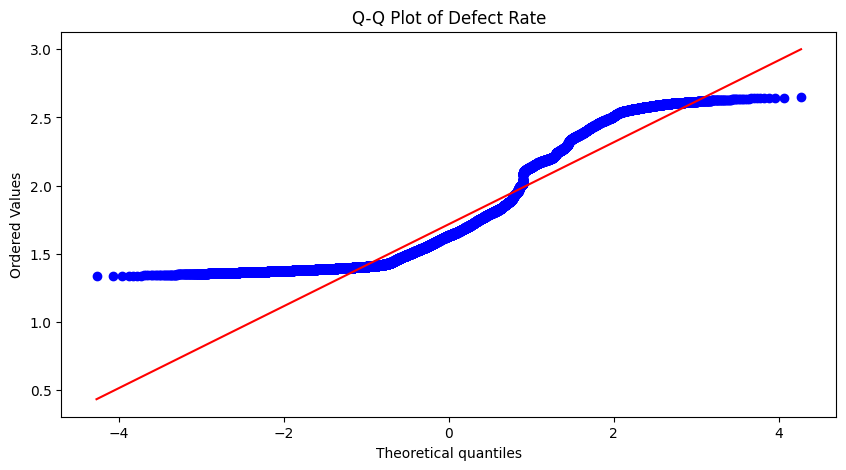

In [17]:
plt.figure(figsize=(10,5))
stats.probplot(df['defect_rate'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Defect Rate')
plt.show()

In [18]:
# 불량률에 따른 상태 설정
def classify_bad_rate(rate, q1, q2, q3):
    if rate >= q3:
        return '경고'
    elif (rate >= q2) % (rate < q3):
        return '주의'
    else:
        return '정상'

q1 = np.percentile(y, 25)
q2 = np.percentile(y, 50)
q3 = np.percentile(y, 75)

predicted_states = [classify_bad_rate(rate, q1, q2, q3) for rate in y_pred]

for i, state in enumerate(predicted_states[:10]):
    print(f"예측 불량률: {y_pred[i]:.2f}, 상태: {state}")

예측 불량률: 1.56, 상태: 정상
예측 불량률: 1.46, 상태: 정상
예측 불량률: 2.43, 상태: 경고
예측 불량률: 1.56, 상태: 정상
예측 불량률: 1.83, 상태: 정상
예측 불량률: 1.49, 상태: 정상
예측 불량률: 1.60, 상태: 정상
예측 불량률: 1.39, 상태: 정상
예측 불량률: 1.39, 상태: 정상
예측 불량률: 1.41, 상태: 정상
